In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from matplotlib.ticker import MaxNLocator
import math
from scipy import signal
from scipy.fftpack import fft
from scipy import ndimage
from scipy.io import loadmat
import os
%matplotlib inline

In [2]:
Tot=300
dt=1./60
T=np.arange(dt,Tot,dt)
# OU ; input
tau= 1
D = 27*10**5
OU=np.zeros(len(T))
mu, sigma = 0, 1
for i in range(len(T)-1):
    OU[i+1]=OU[i]*(1-dt/tau)+math.sqrt(D*dt)*np.random.normal(mu,sigma)
# filtering for OUSmoothed
cutoffFreq = 2
b, a = signal.butter(2, 2*cutoffFreq*dt, btype='low', analog=False)
LPOU = signal.filtfilt(b, a, OU)

In [3]:
xs = LPOU-min(LPOU)
ys = []
zs = []
z = 0
y = 0
alpha = 40
beta =  2
k = 50
g = 2
phi = 20

dt = 1./60.
for x in xs:
    dy = (-alpha*y+k*(x-phi*z))*dt
    dz = (-beta*z+g*y)*dt
    z = z+dz
    y = y+dy
    zs.append(z)
    ys.append(y)
zs = np.array(zs)
ys = np.array(ys)

In [4]:
# guess = 1./cutoffFreq/dt
# print(guess)

Vx = ndimage.gaussian_filter1d(xs, sigma=17.5, order=1, mode='reflect') / dt
Vy = ndimage.gaussian_filter1d(ys, sigma=17.5, order=1, mode='reflect') / dt
Ax = ndimage.gaussian_filter1d(xs, sigma=5, order=2, mode='reflect') / dt**2

# r = x+0.5*Vx
# Xcorr_xr = np.correlate(xs,r, 'same')
# (np.argmax(Xcorr_xr)-np.argmax(Xcorr_zz))*dt

8.105320233651723

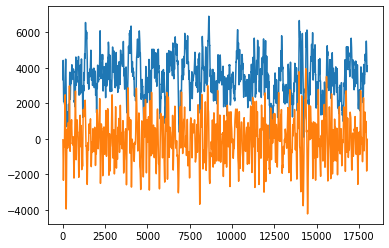

In [5]:
plt.plot(xs)
plt.plot(Vx)
# plt.plot(Ax)
max(xs)/max(Ax)

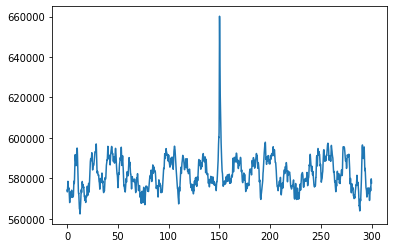

In [6]:
denominator =  np.correlate(np.ones_like(xs),np.ones_like(xs), 'same')
Xcorr_xy = np.correlate(xs,ys, 'same')
NXcorr_xy = Xcorr_xy/denominator
Xcorr_yz = np.correlate(ys,zs, 'same')
NXcorr_yz = Xcorr_yz/denominator
Xcorr_Vxy = np.correlate(Vx,Vy, 'same')
NXcorr_Vxy = Xcorr_Vxy/denominator
plt.plot(T, NXcorr_xy)
# plt.plot(np.correlate(ys,ys, 'same'))
center_index = np.argmax(denominator)

In [8]:
print('tau =', (center_index-np.argmax(NXcorr_yz))*dt) 

tau = 0.18333333333333332


In [9]:
print('one over k =', 1/k) 

one over k = 0.02


In [10]:
print('delta =', (np.argmax(NXcorr_xy)-center_index)*dt)

delta = 0.18333333333333332


In [11]:
np.argmax(NXcorr_Vxy)

9015

(7000, 7500)

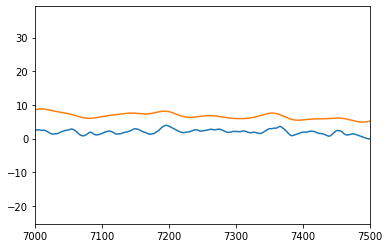

In [12]:
r = x+0.5*Vx
plt.plot(ys/np.std(ys))
plt.plot(r/np.std(r))
plt.xlim([7000, 7500])

In [13]:
np.argmax(NXcorr_xy)-center_index

11

In [14]:
Xcorr_xr = np.correlate(xs,r, 'same')
NXcorr_xr = Xcorr_xr/denominator

In [15]:
(np.argmax(NXcorr_xr)-center_index)*dt

-139.85

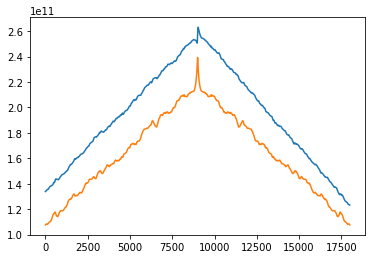

In [19]:
plt.plot(Xcorr_xr)
plt.plot(np.correlate(xs,xs, 'same'))

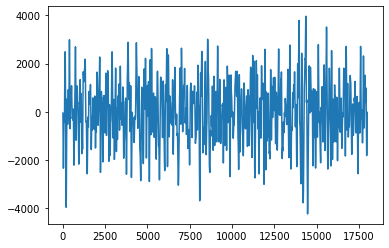

In [20]:
plt.plot(Vx)